In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import matplotlib
import analysis_pca
import generate_linear_model

Ts = 1000
data_path = r'C:\Users\IBS\Desktop\python_code_N2'
save_path = r'C:\Users\IBS\Desktop\figures'

In [2]:
#For FN data PCA

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)
apca = analysis_pca.analysis_pca(Ts, data_cat, save_path)
data_cat_sm = apca.smoothing_data()  # Smoothed data
PCA_total = apca.pca_analy(data_cat_sm)  # PCA

pc_ori = []
for a in range(8):
    pc_ori.append(PCA_total[a]['p'].T)

pc_ori = np.array(pc_ori)

Dimensions: 1, Variance explained: 57.01%
Dimensions: 2, Variance explained: 76.14%
Dimensions: 3, Variance explained: 82.16%
Dimensions: 4, Variance explained: 86.65%
Dimensions: 5, Variance explained: 89.17%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 64.05%
Dimensions: 2, Variance explained: 78.73%
Dimensions: 3, Variance explained: 83.99%
Dimensions: 4, Variance explained: 87.57%
Dimensions: 5, Variance explained: 90.69%
Dimensions to be reduced: 4
Dimensions: 1, Variance explained: 65.68%
Dimensions: 2, Variance explained: 75.64%
Dimensions: 3, Variance explained: 80.99%
Dimensions: 4, Variance explained: 85.31%
Dimensions: 5, Variance explained: 88.71%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 63.94%
Dimensions: 2, Variance explained: 75.89%
Dimensions: 3, Variance explained: 81.82%
Dimensions: 4, Variance explained: 85.62%
Dimensions: 5, Variance explained: 88.53%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 64.24%
Dimens

In [3]:
peak = []
for a in range(np.shape(val_cat)[0]):
    M = []
    for ori in range(8):
        temp = val_cat[a][ori]
        M.append(np.max(temp,axis = 1))
        # peak[a][ori]  = np.max(temp,axis = 1)
    peak.append(M)

peak = np.array(peak, dtype = object)

In [4]:
final = []
for ori_num in range(8):
    finalp=[]
    for a in range(np.shape(data_cat)[0]):
        temp_data = data_cat[a][ori_num]
        pram = np.array([peak[a][ori_num], dur_cat[a][ori_num]])
        pram2= np.mean(pram, axis = 1)
        
        linmod = generate_linear_model.generate_linear_model(temp_data, pram, pram2);
        finalp.append(linmod)
    final.append(finalp)

In [5]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from matplotlib import gridspec
from filter_matrix import filter_matrix

plot_data = {}
for ori_num in range(8):
    
    pp1, pp2, pp3, pp4, pp5 = [], [], [], [], []
    for a in range(np.shape(final)[1]):
        temp = final[ori_num][a]
        pp1.append(temp['wv0'])
        pp2.append(temp['wv'])
        pp3.append(temp['wr'])
        pp4.append(temp['ssc'])
        pp5.append(temp['ssc0'])

    # Stack and smooth
    zpp1 = filter_matrix(np.array(pp1), sigma=2)
    zpp2 = filter_matrix(np.array(pp2), sigma=2)
    zpp3 = filter_matrix(np.array(pp3), sigma=2)
    zpp4 = filter_matrix(np.array(pp4), sigma=2)
    zpp5 = filter_matrix(np.array(pp5), sigma=2)

    plot_data[ori_num] = [zpp1, zpp2, zpp3, zpp4, zpp5]

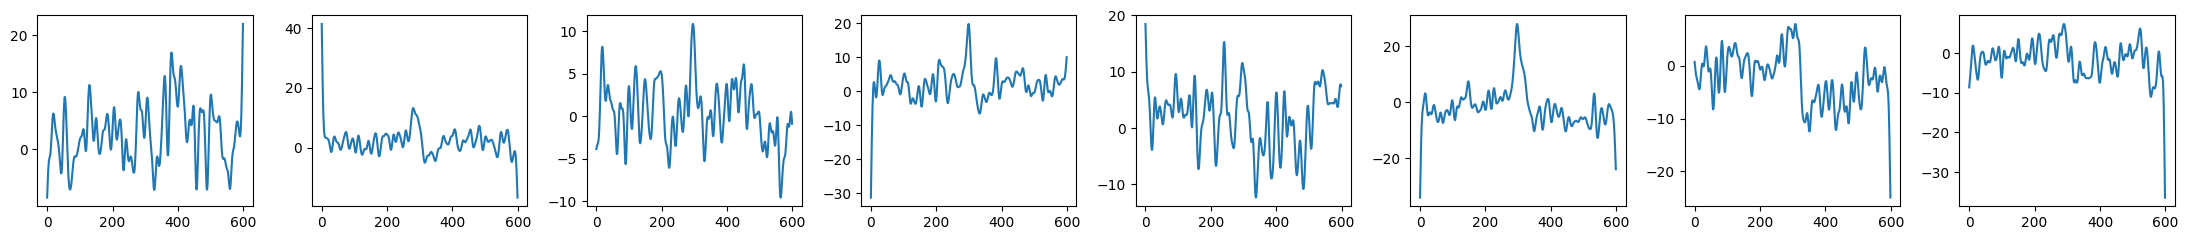

In [53]:
# Plotting for each
# for b in range(5):
# up ur r dr down dl l ul -> right ur u ul left dl d dr [2, 1, 0, 7, 6, 5, 4, 3]
b = 3
fig = plt.figure(figsize=(22, 2.5))
gs = gridspec.GridSpec(1, 8)
time = np.arange(-300, 300)
# for a in range(8):
c = 0
# for a in [2, 1, 0, 7, 6, 5, 4, 3]:
for a in range(8):
    ax = fig.add_subplot(gs[0, c])
    # ax.imshow(plot_data[a][b], aspect='auto', cmap='jet', interpolation='none', extent=[-300, 300, 67, 0])
    ax.plot(np.mean(plot_data[a][b],axis=0))
    # ax.set(xticks=np.linspace(-300, 300, 10), xticklabels=np.arange(-300, 300, 100))
    # ax.set_xticklabels([-300, 300])
    # ax.set_xlim([-300, 300])
    c = c + 1
plt.tight_layout()

# plt.savefig('linear_model.jpg', dpi=300)
plt.show()

# extent=[0, 120, 10, 0]);
# ax.set(xticks=np.linspace(-300, 300, 10), xticklabels=np.arange(-300, 300, 100), yticks=[0, 10], yticklabels=[0, 1]);

In [21]:
np.shape(plot_data[0])

(5, 67, 600)

In [42]:
#For ssc0 data PCA

b = 0  #ssc0

lin_data = []
for a in range(8):
    temp = plot_data[a]
    lin_data.append(temp[b])
lin_data = np.array(lin_data)

PCA_total2 = apca.pca_analy(lin_data)

pc_lin = []
for a in range(8):
    pc_lin.append(PCA_total2[a]['p'].T)

pc_lin = np.array(pc_lin)

Dimensions: 1, Variance explained: 57.01%
Dimensions: 2, Variance explained: 76.14%
Dimensions: 3, Variance explained: 82.16%
Dimensions: 4, Variance explained: 86.65%
Dimensions: 5, Variance explained: 89.17%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 64.05%
Dimensions: 2, Variance explained: 78.73%
Dimensions: 3, Variance explained: 83.99%
Dimensions: 4, Variance explained: 87.57%
Dimensions: 5, Variance explained: 90.69%
Dimensions to be reduced: 4
Dimensions: 1, Variance explained: 65.68%
Dimensions: 2, Variance explained: 75.64%
Dimensions: 3, Variance explained: 80.99%
Dimensions: 4, Variance explained: 85.31%
Dimensions: 5, Variance explained: 88.71%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 63.94%
Dimensions: 2, Variance explained: 75.89%
Dimensions: 3, Variance explained: 81.82%
Dimensions: 4, Variance explained: 85.62%
Dimensions: 5, Variance explained: 88.53%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 64.24%
Dimens

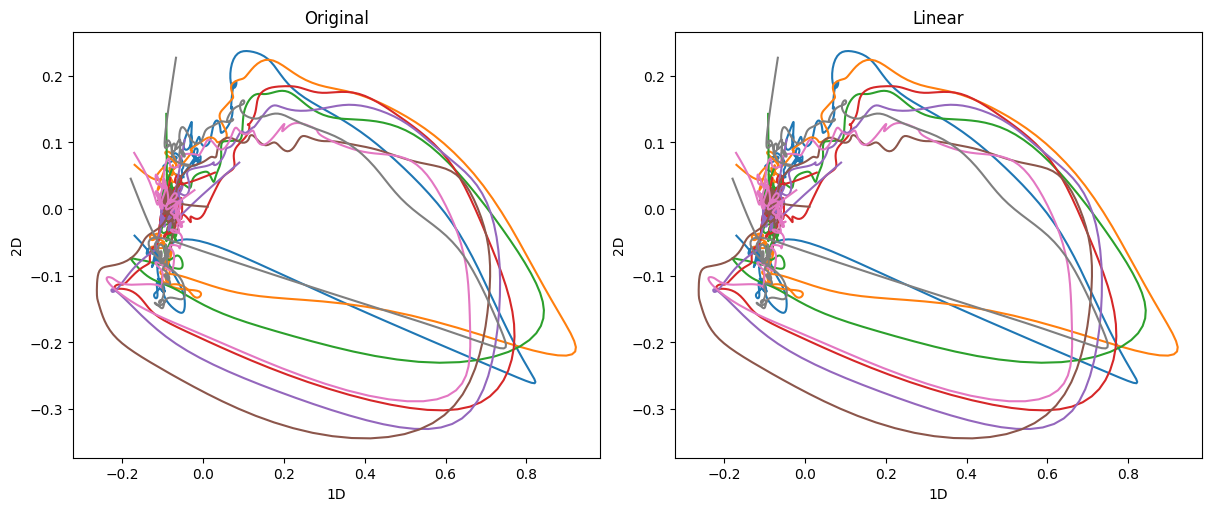

In [43]:
# plotting

fig = plt.figure(constrained_layout=True,figsize=(12,5))

ax = fig.add_subplot(1, 2, 1)
for a in range(8):
    X = pc_ori[a, 0]; Y = pc_ori[a, 1];
    ax.plot(X, Y)
ax.set_title("Original")
ax.set_xlabel('1D'); ax.set_ylabel('2D');


ax = fig.add_subplot(1, 2, 2)
for a in range(8):
    X = pc_lin[a, 0]; Y = pc_lin[a, 1];
    ax.plot(X, Y)
ax.set_title("Linear")
ax.set_xlabel('1D'); ax.set_ylabel('2D');

In [44]:
# Fitting

time = np.linspace(-300, 300, 600)
r_s_total = []
for a in range(8):
    
    resid = np.linalg.norm(pc_ori[a] - pc_lin[a], axis=1)**2
    r_s = 1 - resid / (pc_lin[a].size * pc_lin[a].var(axis=1))
    r_s_total.append(r_s)

r_s_total = np.array(r_s_total)

Text(0.5, 1.0, 'direction=0, pc=4, R^2=1.0')

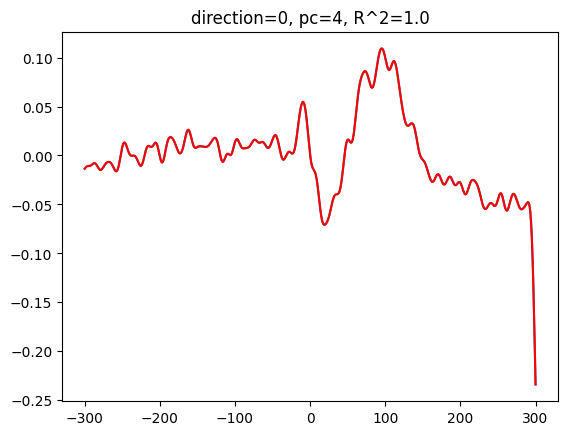

In [45]:
# Plotting

a = 0
b = 4

r_s = r_s_total[a][b]
plt.plot(time, pc_ori[a][b], time, pc_lin[a][b], 'r')
plt.title(f'direction={a}, pc={b}, R^2={r_s}')